# Business problem:-


# Given HR dataset,we need to predict if an employee is promoted or not.

In [1]:
import pandas as pd
import seaborn as sns
data=pd.read_csv(r"C:\Users\91996\Desktop\ML\Purple\hr problem data - train.csv")

In [2]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
1,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
2,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
3,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
4,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44492 entries, 0 to 44491
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           44492 non-null  int64  
 1   department            44492 non-null  object 
 2   region                44492 non-null  object 
 3   education             42534 non-null  object 
 4   gender                44492 non-null  object 
 5   recruitment_channel   44492 non-null  object 
 6   no_of_trainings       44492 non-null  int64  
 7   age                   44492 non-null  int64  
 8   previous_year_rating  41125 non-null  float64
 9   length_of_service     44492 non-null  int64  
 10  KPIs_met >80%         44492 non-null  int64  
 11  awards_won?           44492 non-null  int64  
 12  avg_training_score    44492 non-null  int64  
 13  is_promoted           44492 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [4]:
del data['employee_id']

# Handling Missing Values:-

In [5]:
data.isna().sum()

department                 0
region                     0
education               1958
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3367
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
data.education.value_counts()

Bachelor's          29807
Master's & above    12086
Below Secondary       641
Name: education, dtype: int64

In [7]:
data.education=data.education.fillna("Missing category")

In [8]:
import numpy as np
data.previous_year_rating=data.previous_year_rating.fillna(np.float64(10))

In [132]:
data.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Department_region       0
Education_Region        0
dtype: int64

# Exploratory Data Analysis:-

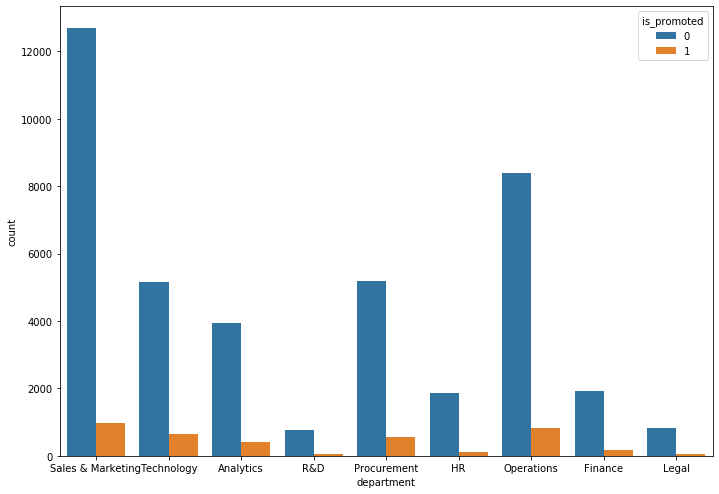

In [10]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="department",hue="is_promoted")


# Insight 1:-The Sales and Marketing Department has the highest number of people where they are not promoted.

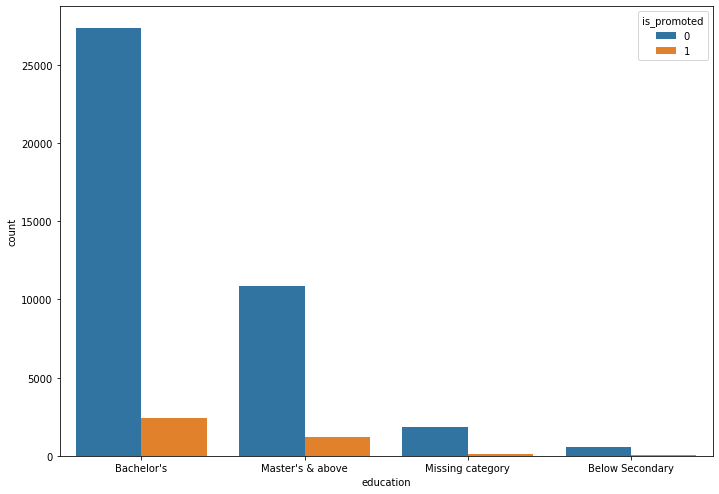

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="education",hue="is_promoted")

# Most candidates have completed their Bachelors but the ratio of promotion for each category looks the same.

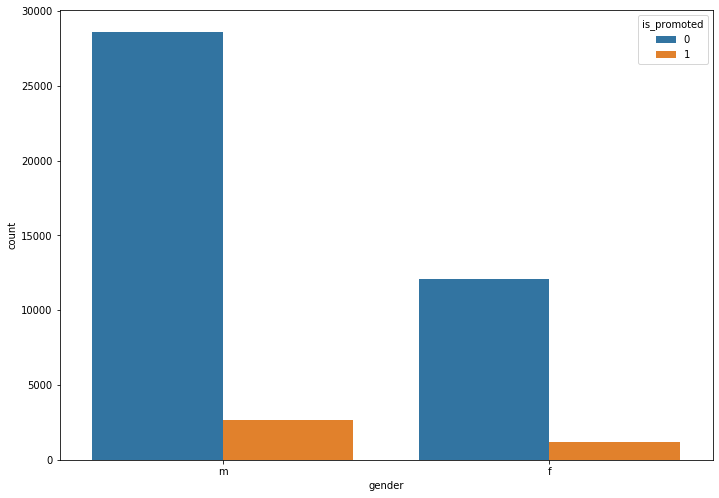

In [12]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="gender",hue="is_promoted")

In [13]:
m=data[data.gender=='m'].groupby("is_promoted")

In [14]:
for i,j in m:
    print(len(j),i)

28616 0
2630 1


In [15]:
f=data[data.gender=='f'].groupby("is_promoted")

In [16]:
for i,j in f:
    print(len(j),i)

12085 0
1161 1


# Insight 2:-Although the population of females is lesser than males but the count is higher compared to male promotions as male has 8.41% while female has 8.7%.

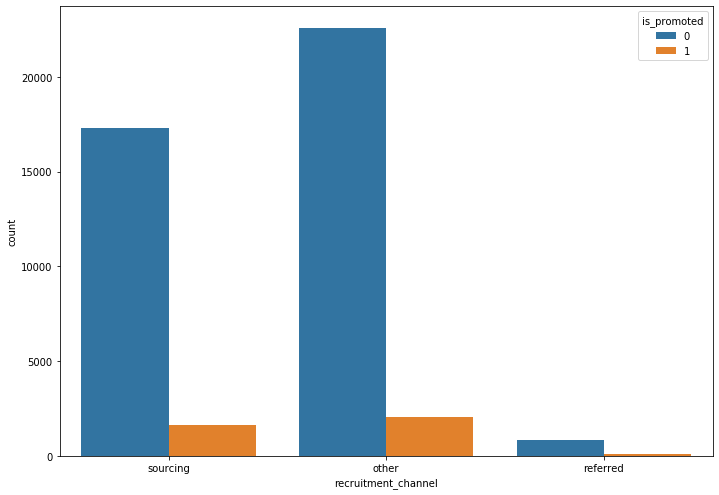

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="recruitment_channel",hue="is_promoted")


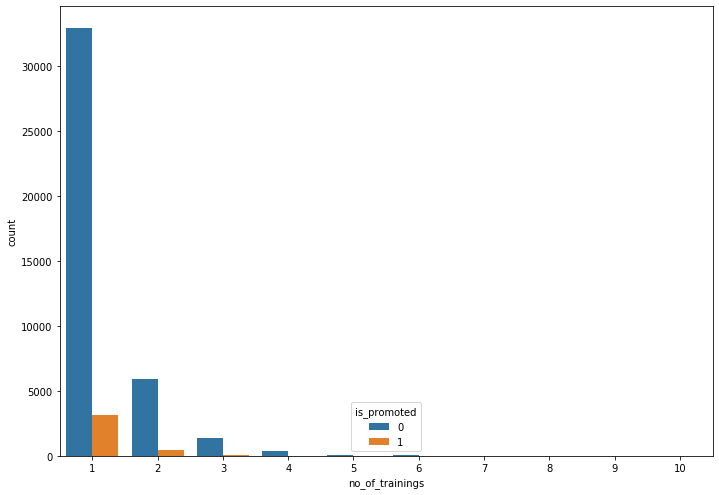

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="no_of_trainings",hue="is_promoted")


# Insight:-Most people have completed 1 training and the no of people completing more than 4 trainings goes down drastically.

In [19]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

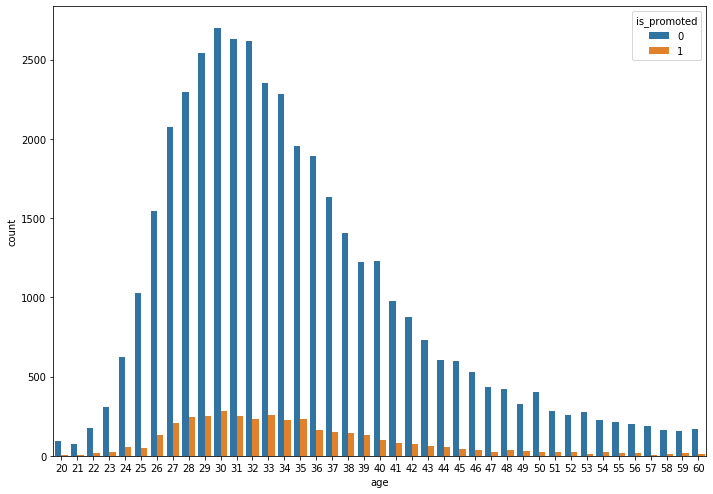

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="age",hue="is_promoted")

# The age feature follows normal distribution with maximum of the data at the mean and less at the 3rd standard deviation.

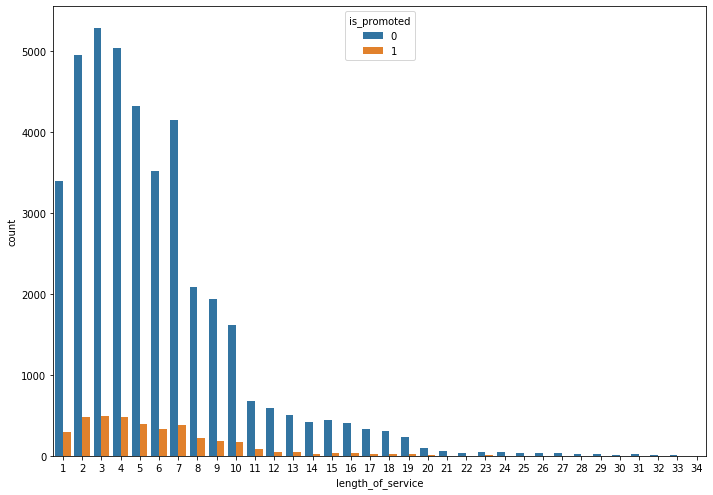

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="length_of_service",hue="is_promoted")

# Most of the promotions are in the first four years of the service of any candidate and then both the no of people and promotions decreases.

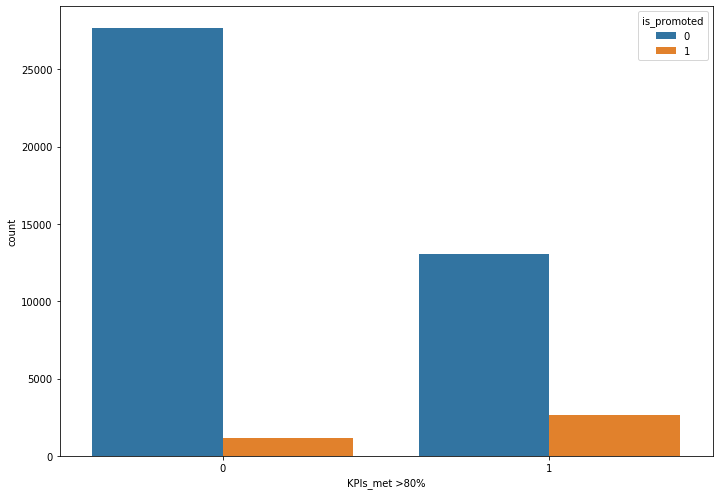

In [22]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="KPIs_met >80%",hue="is_promoted")

# The candidates who are meeting the KPI have a higher chance of promotion compared to candidates who have not met the target.

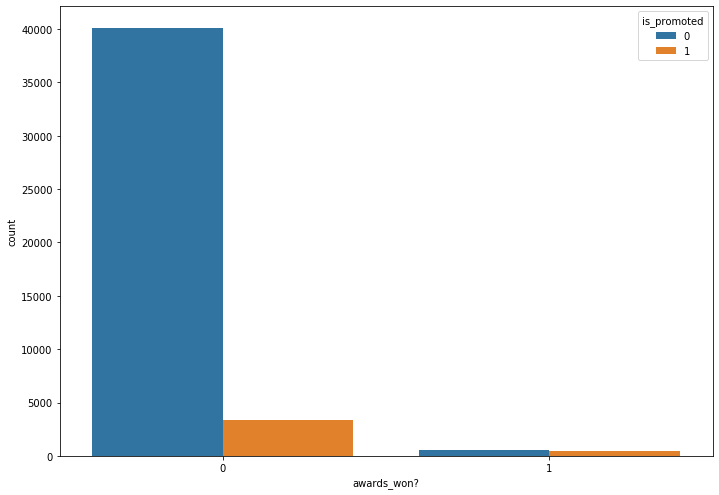

In [23]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="awards_won?",hue="is_promoted")

# Seems like there is an advantage of getting an award.As almost 50% of the candidates who have got an award got a promotion as well.

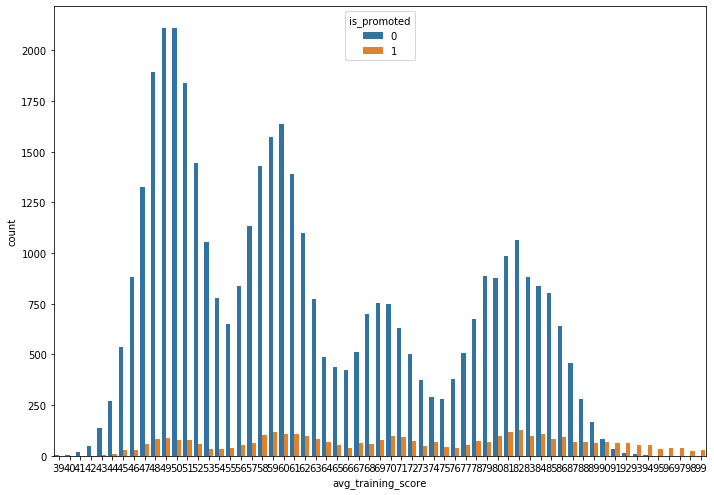

In [24]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x="avg_training_score",hue="is_promoted")

# training Scores shows that higher the score the number of people not promoted decreases.

# Data Cleaning:-


In [25]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
1,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
2,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
3,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
4,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1


In [26]:
data.region=[np.int64(i.split("_")[1]) for i in data.region]

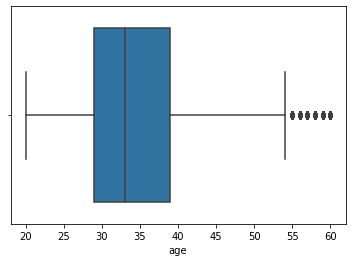

In [27]:
sns.boxplot(x='age',data=data)

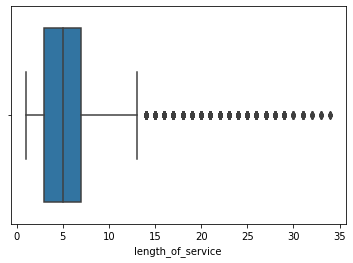

In [28]:
sns.boxplot(data.length_of_service)


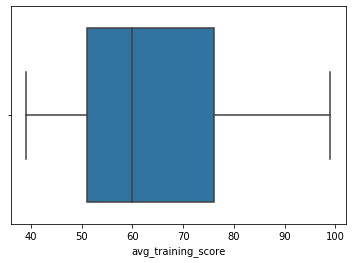

In [29]:
sns.boxplot(data["avg_training_score"])

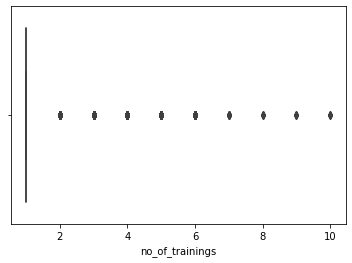

In [30]:
sns.boxplot(data.no_of_trainings)

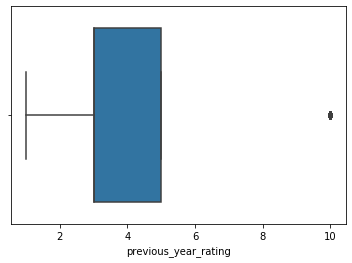

In [31]:
sns.boxplot(data.previous_year_rating)

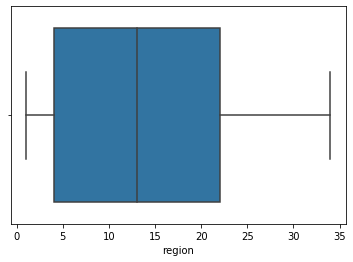

In [32]:
sns.boxplot(data.region)

# Removing outliers using IQR
IQR=Q3-Q1
We keep only those values which are in the range of lower and upper bracket
Lower Bracket=Q1-(1.5IQR) and Higher Bracket=Q1+(1.5IQR)

In [158]:
def outliers(feature):
    q1=np.percentile(feature,25)
    q3=np.percentile(feature,75)
    iqr=q3-q1
    lower_bracket=q1-(1.5*iqr)
    upper_bracket=q3+(1.5*iqr)
    
    data_points=[i for i in feature if i<lower_bracket or i>upper_bracket]
    
    index_names=[]
    for i in data_points:
        index_names.extend(data[feature==i].index)
    indexes=set(index_names)
    for i in indexes:
        data.drop(i, inplace = True)
    
    return lower_bracket,upper_bracket

In [34]:
feature=data.age
outliers(feature)

(14.0, 54.0)

In [35]:
feature=data.length_of_service
outliers(feature)

(-3.0, 13.0)

In [36]:
feature=data['no_of_trainings']
outliers(feature)

(1.0, 1.0)

In [37]:
feature=data['previous_year_rating']
outliers(feature)

(0.0, 8.0)

# Feature Engineering:-

In [38]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
4,Sales & Marketing,7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
5,R&D,2,Master's & above,m,sourcing,1,37,3.0,7,0,0,84,0
6,Procurement,14,Bachelor's,m,other,1,35,3.0,7,0,0,75,0


# Creating extra features by combining the categorical variables:-

In [39]:
data.reset_index(drop=True, inplace=True)

In [40]:
data['Department_region']=[data.department[i]+str(data.region[i]) for i in range(30504)]

In [41]:
data['Education_Region']=[data.education[i]+str(data.region[i]) for i in range(30504)]

In [42]:
y=data['is_promoted']

# Encoding

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [44]:
data.department= le.fit_transform(data.department)

In [45]:
columns=['education','gender','recruitment_channel','Department_region','Education_Region']

In [46]:
for i in columns:
    data[i]=le.fit_transform(data[i])

In [47]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Department_region,Education_Region
0,7,19,0,1,2,1,34,3.0,7,0,0,50,0,230,10
1,8,26,0,1,0,1,45,3.0,2,0,0,73,0,271,18
2,7,7,0,0,2,1,35,5.0,3,1,0,50,1,251,31
3,6,2,2,1,2,1,37,3.0,7,0,0,84,0,200,58
4,5,14,0,1,0,1,35,3.0,7,0,0,75,0,163,5


# Feature Selection:-

In [229]:
y=data['is_promoted']
del data['is_promoted']


In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

In [232]:
print(X_train.shape,y_train.shape)

(21124, 14) (21124,)


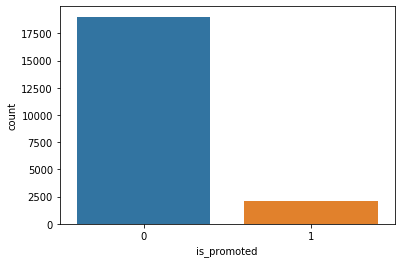

In [233]:
sns.countplot(y_train)

# Dealing with Unbalanced Dataset

In [245]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'Department_region', 'Education_Region']], y_train)


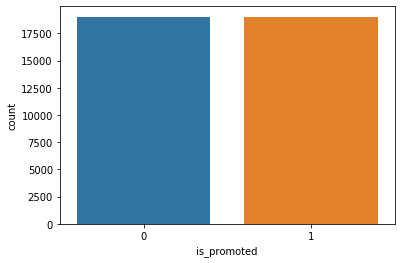

In [246]:
sns.countplot(y_train)

In [234]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

In [249]:
forward_selection=SFS(RandomForestClassifier(n_estimators=200,random_state=10,n_jobs=-1),
    k_features=14,forward=True,floating=False,verbose=2,scoring='f1',
   cv=5,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:   19.4s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   32.9s finished

[2021-08-19 16:32:27] Features: 1/14 -- score: 0.7357509345555704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:   21.1s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   37.5s finished

[2021-08-19 16:33:04] Features: 2/14 -- score: 0.8086384688993226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   28.7s remaining:   57.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   45.8s finished

[2021-08-19 16:33:50] Features: 3/14 -- score: 0.8690318406090268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11

In [250]:
forward_selection.k_feature_names_

('department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'Department_region',
 'Education_Region')

In [251]:
forward_selection=SFS(RandomForestClassifier(n_estimators=200,random_state=10,n_jobs=-1),
    k_features=13,forward=True,floating=False,verbose=2,scoring='f1',
   cv=5,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:   18.1s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   32.7s finished

[2021-08-19 17:08:40] Features: 1/13 -- score: 0.7357509345555704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:   22.1s remaining:   35.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   37.4s finished

[2021-08-19 17:09:17] Features: 2/13 -- score: 0.8086384688993226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   27.2s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   44.3s finished

[2021-08-19 17:10:01] Features: 3/13 -- score: 0.8690318406090268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11

In [253]:

forward_selection.k_score_

0.9420973878534253

In [254]:
forward_selection.k_feature_names_

('department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'avg_training_score',
 'Department_region',
 'Education_Region')

# Removing awards won feature as it doesnot provide feature importance

In [256]:
del X_train['awards_won?']
del X_test['awards_won?']

# Modelling:-

# Random Forest:-

In [258]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[100,150,200]
max_depth=[20,30,40,None]
min_samples_split=[2,4,6]
min_samples_leaf=[1,2,3,4]
max_features=["auto","sqrt","log2"]
ccp_alpha=[0.0,0.00001,0.0001]

In [259]:
parameters_list=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,ccp_alpha=ccp_alpha)

In [260]:
parameters_list

{'n_estimators': [100, 150, 200],
 'max_depth': [20, 30, 40, None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 3, 4],
 'max_features': ['auto', 'sqrt', 'log2'],
 'ccp_alpha': [0.0, 1e-05, 0.0001]}

In [261]:
R_Model=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=2)

In [262]:
from sklearn.model_selection import RandomizedSearchCV
Model_rf=RandomizedSearchCV(estimator=R_Model,param_distributions=parameters_list,scoring='f1',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [263]:
randomforest_model=Model_rf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100

building tree 6 of 100building tree 7 of 100
building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100building tree 32 of 100

building tree 33 of 100

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.3s



building tree 34 of 100building tree 35 of 100building tree 36 of 100


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100building tree 50 of 100

building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100building tree 71 of 100

building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 7

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [264]:
randomforest_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'ccp_alpha': 1e-05}

In [265]:
R_Model=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=2,
                              n_estimators=100,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             max_features='auto',
                             max_depth=None,
                             ccp_alpha= 0.00001)

In [266]:
Random_forest=R_Model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100building tree 21 of 100

building tree 22 of 100building tree 23 of 100

building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100

building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100building tree 47 of 100

building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [267]:
predicted_train=Random_forest.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [276]:
from sklearn.metrics import *

In [269]:
f1_score(y_train, predicted_train)

0.9948372142029291

In [270]:
test_predicted=Random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [271]:
f1_score(y_test, test_predicted)

0.41115702479338845

In [277]:
accuracy_score(y_test,test_predicted)

0.8920658966104904

In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4732
           1       0.47      0.36      0.41       549

    accuracy                           0.89      5281
   macro avg       0.70      0.66      0.68      5281
weighted avg       0.88      0.89      0.89      5281



# XGBOOST:-

In [278]:
from xgboost import XGBClassifier
max_depth=[3,5,8,10,15,20]
min_child_weight=[1,3,5,6]
gamma =[0.0001,0.01,0.1,0.5]
scale_pos_weight=[0.1,0.5,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate =[0.0001,0.00001,0.01,1]


In [279]:
parameters_xgb=dict(max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,scale_pos_weight=scale_pos_weight,reg_alpha=reg_alpha,learning_rate=learning_rate)

In [280]:
XGB_Model=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist')

In [281]:
crosscvXGB=RandomizedSearchCV(estimator=XGB_Model,param_distributions=parameters_xgb,scoring='f1',cv=8,verbose=3,return_train_score=True,n_iter=10)

In [282]:
XGB_train_model=crosscvXGB.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV] scale_pos_weight=0.5, reg_alpha=1e-05, min_child_weight=6, max_depth=8, learning_rate=0.01, gamma=0.5 
[17:51:33] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:51:34] ======== Monitor: SketchContainer ========
[17:51:34] MakeCuts: 0.001642s, 1 calls @ 1642us

[17:51:34] Prune: 0.000678s, 1 calls @ 678us

[17:51:34] Push: 9.7e-05s, 1 calls @ 97us

[17:51:34] Unique: 0.000875s, 2 calls @ 875us

[17:51:34] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:51:34] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:51:35] ======== Monitor: Learner ========
[17:51:35] Configure: 0s, 1 calls @ 0us

[17:51:35] GetGradient: 0.008309s, 100 calls @ 8309us

[17:51:35] PredictRaw: 0.934157s, 100 calls @ 934157us

[17:51:35] UpdateOneIter: 1.07043s, 100 calls @ 1070427us

[17:51:35] ======== Monitor: GBTree ========
[17:51:35] BoostNewTrees: 1.08016s, 100 calls @ 1080163us

[17:51:35] CommitModel: 0.009038s, 100 calls @ 9038us

[17:51:35] ======== Device 0 Memory Allocations:  ========
[17:51:35] Peak memory usage: 7MiB
[17:51:35] Number of allocations: 35977
[17:51:35] ======== Monitor: updater_gpu_hist ====

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[17:51:36] ======== Monitor: Learner ========
[17:51:36] Configure: 0.000508s, 1 calls @ 508us

[17:51:36] GetGradient: 0.007771s, 100 calls @ 7771us

[17:51:36] PredictRaw: 0.000602s, 100 calls @ 602us

[17:51:36] UpdateOneIter: 1.05874s, 100 calls @ 1058740us

[17:51:36] ======== Monitor: GBTree ========
[17:51:36] BoostNewTrees: 1.03909s, 100 calls @ 1039087us

[17:51:36] CommitModel: 0.008668s, 100 calls @ 8668us

[17:51:36] ======== Device 0 Memory Allocations:  ========
[17:51:36] Peak memory usage: 7MiB
[17:51:36] Number of allocations: 72420
[17:51:36] ======== Monitor: updater_gpu_hist ========
[17:51:36] InitData: 0.009317s, 100 calls @ 9317us

[17:51:36] InitDataOnce: 0.009303s, 1 calls @ 9303us

[17:51:36] Update: 1.03798s, 100 calls @ 1037975us

[17:51:36] UpdatePredictionCache: 0.008575s, 100 calls @ 8575us

[17:51:36] ======== Monitor: gradient_based_sampler ========
[17:51:36] Sample: 2.3e-05s, 100 calls @ 23us

[17:51:36] ======== Monitor: GPUHistMakerDevice0 ========


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[17:51:37] ======== Monitor: Learner ========
[17:51:37] Configure: 0.000742s, 1 calls @ 742us

[17:51:37] GetGradient: 0.008642s, 100 calls @ 8642us

[17:51:37] PredictRaw: 0.000556s, 100 calls @ 556us

[17:51:37] UpdateOneIter: 1.06088s, 100 calls @ 1060884us

[17:51:37] ======== Monitor: GBTree ========
[17:51:37] BoostNewTrees: 1.0387s, 100 calls @ 1038700us

[17:51:37] CommitModel: 0.009957s, 100 calls @ 9957us

[17:51:37] ======== Device 0 Memory Allocations:  ========
[17:51:37] Peak memory usage: 7MiB
[17:51:37] Number of allocations: 107673
[17:51:37] ======== Monitor: updater_gpu_hist ========
[17:51:37] InitData: 0.00848s, 100 calls @ 8480us

[17:51:37] InitDataOnce: 0.008466s, 1 calls @ 8466us

[17:51:37] Update: 1.03758s, 100 calls @ 1037585us

[17:51:37] UpdatePredictionCache: 0.009835s, 100 calls @ 9835us

[17:51:37] ======== Monitor: gradient_based_sampler ========
[17:51:37] Sample: 2.2e-05s, 100 calls @ 22us

[17:51:37] ======== Monitor: GPUHistMakerDevice0 ========
[

[17:51:41] ======== Monitor: Learner ========
[17:51:41] Configure: 0.000772s, 1 calls @ 772us

[17:51:41] GetGradient: 0.009089s, 100 calls @ 9089us

[17:51:41] PredictRaw: 0.00069s, 100 calls @ 690us

[17:51:41] UpdateOneIter: 1.15676s, 100 calls @ 1156763us

[17:51:41] ======== Monitor: GBTree ========
[17:51:41] BoostNewTrees: 1.1327s, 100 calls @ 1132695us

[17:51:41] CommitModel: 0.010776s, 100 calls @ 10776us

[17:51:41] ======== Device 0 Memory Allocations:  ========
[17:51:41] Peak memory usage: 7MiB
[17:51:41] Number of allocations: 218444
[17:51:41] ======== Monitor: updater_gpu_hist ========
[17:51:41] InitData: 0.008292s, 100 calls @ 8292us

[17:51:41] InitDataOnce: 0.008275s, 1 calls @ 8275us

[17:51:41] Update: 1.13123s, 100 calls @ 1131227us

[17:51:41] UpdatePredictionCache: 0.010637s, 100 calls @ 10637us

[17:51:41] ======== Monitor: gradient_based_sampler ========
[17:51:41] Sample: 2.9e-05s, 100 calls @ 29us

[17:51:41] ======== Monitor: GPUHistMakerDevice0 ========

[17:51:46] ======== Monitor: Learner ========
[17:51:46] Configure: 0.000766s, 1 calls @ 766us

[17:51:46] GetGradient: 0.007372s, 100 calls @ 7372us

[17:51:46] PredictRaw: 0.000556s, 100 calls @ 556us

[17:51:46] UpdateOneIter: 1.77451s, 100 calls @ 1774509us

[17:51:46] ======== Monitor: GBTree ========
[17:51:46] BoostNewTrees: 1.75286s, 100 calls @ 1752855us

[17:51:46] CommitModel: 0.010739s, 100 calls @ 10739us

[17:51:46] ======== Device 0 Memory Allocations:  ========
[17:51:46] Peak memory usage: 7MiB
[17:51:46] Number of allocations: 358728
[17:51:46] ======== Monitor: updater_gpu_hist ========
[17:51:46] InitData: 0.007286s, 100 calls @ 7286us

[17:51:46] InitDataOnce: 0.007272s, 1 calls @ 7272us

[17:51:46] Update: 1.75182s, 100 calls @ 1751824us

[17:51:46] UpdatePredictionCache: 0.010632s, 100 calls @ 10632us

[17:51:46] ======== Monitor: gradient_based_sampler ========
[17:51:46] Sample: 2.4e-05s, 100 calls @ 24us

[17:51:46] ======== Monitor: GPUHistMakerDevice0 ======

[17:51:50] ======== Monitor: SketchContainer ========
[17:51:50] MakeCuts: 0.001144s, 1 calls @ 1144us

[17:51:50] Prune: 0.000565s, 1 calls @ 565us

[17:51:50] Push: 5e-05s, 1 calls @ 50us

[17:51:50] Unique: 0.000591s, 2 calls @ 591us

[17:51:50] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:51:50] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:51:52] ======== Monitor: Learner ========
[17:51:52] Configure: 0.00121s, 1 calls @ 1210us

[17:51:52] GetGradient: 0.007503s, 100 calls @ 7503us

[17:51:52] PredictRaw: 0.000587s, 100 calls @ 587us

[17:51:52] UpdateOneIter: 1.89643s, 100 calls @ 1896433us

[17:51:52] ======== Monitor: GBTree ========
[17:51:52] BoostNewTrees: 1.87366s, 100 calls @ 1873656us

[17:51:52] CommitModel: 0.011055s, 100 calls @ 11055us

[17:51:52] ======== Device 0 Memory Allocations:  ========
[17:51:52] Peak memory usage: 7MiB
[17:51:52] Number of allocations: 577253
[17:51:52] ======== Monitor: updater_gpu_his

[17:51:58] ======== Monitor: Learner ========
[17:51:58] Configure: 0.000622s, 1 calls @ 622us

[17:51:58] GetGradient: 0.008352s, 100 calls @ 8352us

[17:51:58] PredictRaw: 0.000724s, 100 calls @ 724us

[17:51:58] UpdateOneIter: 2.05667s, 100 calls @ 2056670us

[17:51:58] ======== Monitor: GBTree ========
[17:51:58] BoostNewTrees: 1.99908s, 100 calls @ 1999080us

[17:51:58] CommitModel: 0.045275s, 100 calls @ 45275us

[17:51:58] ======== Device 0 Memory Allocations:  ========
[17:51:58] Peak memory usage: 7MiB
[17:51:58] Number of allocations: 797556
[17:51:58] ======== Monitor: updater_gpu_hist ========
[17:51:58] InitData: 0.00838s, 100 calls @ 8380us

[17:51:58] InitDataOnce: 0.008363s, 1 calls @ 8363us

[17:51:58] Update: 1.99784s, 100 calls @ 1997837us

[17:51:58] UpdatePredictionCache: 0.045136s, 100 calls @ 45136us

[17:51:58] ======== Monitor: gradient_based_sampler ========
[17:51:58] Sample: 3e-05s, 100 calls @ 30us

[17:51:58] ======== Monitor: GPUHistMakerDevice0 ========


[17:52:02] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:52:02] ======== Monitor: SketchContainer ========
[17:52:02] MakeCuts: 0.001148s, 1 calls @ 1148us

[17:52:02] Prune: 0.000492s, 1 calls @ 492us

[17:52:02] Push: 6.1e-05s, 1 calls @ 61us

[17:52:02] Unique: 0.000599s, 2 calls @ 599us

[17:52:02] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:52:02] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:52:03] ======== Monitor: Learner ========
[17:52:03] Configure: 0.001152s, 1 calls @ 1152us

[17:52:03] GetGradient: 0.009029s, 100 calls @ 9029us

[17:52:03] PredictRaw: 0.00069s, 100 calls @ 690us

[17:52:03] UpdateOneIter: 0.984972s, 100 calls @ 984972us

[17:52:03] ======== Monitor: GBTree ========
[17:52:03] BoostNewTrees: 0.960738s, 100 calls @ 960738us

[17:52:03] CommitModel: 0.010642s, 100 calls @ 10642us

[17:52:03] ======== Device 0 Memory Alloca

[17:52:06] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:52:06] ======== Monitor: SketchContainer ========
[17:52:06] MakeCuts: 0.001463s, 1 calls @ 1463us

[17:52:06] Prune: 0.000795s, 1 calls @ 795us

[17:52:06] Push: 5.7e-05s, 1 calls @ 57us

[17:52:06] Unique: 0.000871s, 2 calls @ 871us

[17:52:06] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:52:06] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:52:06] ======== Monitor: Learner ========
[17:52:06] Configure: 0.001114s, 1 calls @ 1114us

[17:52:06] GetGradient: 0.007814s, 100 calls @ 7814us

[17:52:06] PredictRaw: 0.000529s, 100 calls @ 529us

[17:52:06] UpdateOneIter: 0.891382s, 100 calls @ 891382us

[17:52:06] ======== Monitor: GBTree ========
[17:52:06] BoostNewTrees: 0.871954s, 100 calls @ 871954us

[17:52:06] CommitModel: 0.007993s, 100 calls @ 7993us

[17:52:06] ======== Device 0 Memory Alloca

[17:52:09] ======== Monitor: SketchContainer ========
[17:52:09] MakeCuts: 0.001777s, 1 calls @ 1777us

[17:52:09] Prune: 0.000921s, 1 calls @ 921us

[17:52:09] Push: 0.000103s, 1 calls @ 103us

[17:52:09] Unique: 0.000972s, 2 calls @ 972us

[17:52:09] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:52:09] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:52:10] ======== Monitor: Learner ========
[17:52:10] Configure: 0.000689s, 1 calls @ 689us

[17:52:10] GetGradient: 0.009357s, 100 calls @ 9357us

[17:52:10] PredictRaw: 0.000542s, 100 calls @ 542us

[17:52:10] UpdateOneIter: 0.94639s, 100 calls @ 946390us

[17:52:10] ======== Monitor: GBTree ========
[17:52:10] BoostNewTrees: 0.923545s, 100 calls @ 923545us

[17:52:10] CommitModel: 0.009726s, 100 calls @ 9726us

[17:52:10] ======== Device 0 Memory Allocations:  ========
[17:52:10] Peak memory usage: 7MiB
[17:52:10] Number of allocations: 1096509
[17:52:10] ======== Monitor: updater_gpu_

[17:52:12] ======== Monitor: Learner ========
[17:52:12] Configure: 0.000877s, 1 calls @ 877us

[17:52:12] GetGradient: 0.00798s, 100 calls @ 7980us

[17:52:12] PredictRaw: 0.000448s, 100 calls @ 448us

[17:52:12] UpdateOneIter: 0.434416s, 100 calls @ 434416us

[17:52:12] ======== Monitor: GBTree ========
[17:52:12] BoostNewTrees: 0.414819s, 100 calls @ 414819us

[17:52:12] CommitModel: 0.008425s, 100 calls @ 8425us

[17:52:12] ======== Device 0 Memory Allocations:  ========
[17:52:12] Peak memory usage: 7MiB
[17:52:12] Number of allocations: 1124919
[17:52:12] ======== Monitor: updater_gpu_hist ========
[17:52:12] InitData: 0.008136s, 100 calls @ 8136us

[17:52:12] InitDataOnce: 0.008121s, 1 calls @ 8121us

[17:52:12] Update: 0.413658s, 100 calls @ 413658us

[17:52:12] UpdatePredictionCache: 0.008331s, 100 calls @ 8331us

[17:52:12] ======== Monitor: gradient_based_sampler ========
[17:52:12] Sample: 2e-05s, 100 calls @ 20us

[17:52:12] ======== Monitor: GPUHistMakerDevice0 ========
[

[17:52:13] ======== Monitor: Learner ========
[17:52:13] Configure: 0.000918s, 1 calls @ 918us

[17:52:13] GetGradient: 0.008472s, 100 calls @ 8472us

[17:52:13] PredictRaw: 0.000553s, 100 calls @ 553us

[17:52:13] UpdateOneIter: 0.460428s, 100 calls @ 460428us

[17:52:13] ======== Monitor: GBTree ========
[17:52:13] BoostNewTrees: 0.438882s, 100 calls @ 438882us

[17:52:13] CommitModel: 0.009388s, 100 calls @ 9388us

[17:52:13] ======== Device 0 Memory Allocations:  ========
[17:52:13] Peak memory usage: 7MiB
[17:52:13] Number of allocations: 1153343
[17:52:13] ======== Monitor: updater_gpu_hist ========
[17:52:13] InitData: 0.00961s, 100 calls @ 9610us

[17:52:13] InitDataOnce: 0.009593s, 1 calls @ 9593us

[17:52:13] Update: 0.437708s, 100 calls @ 437708us

[17:52:13] UpdatePredictionCache: 0.009277s, 100 calls @ 9277us

[17:52:13] ======== Monitor: gradient_based_sampler ========
[17:52:13] Sample: 2.7e-05s, 100 calls @ 27us

[17:52:13] ======== Monitor: GPUHistMakerDevice0 ========

[17:52:16] ======== Monitor: Learner ========
[17:52:16] Configure: 0.000628s, 1 calls @ 628us

[17:52:16] GetGradient: 0.00688s, 100 calls @ 6880us

[17:52:16] PredictRaw: 0.00051s, 100 calls @ 510us

[17:52:16] UpdateOneIter: 1.06357s, 100 calls @ 1063565us

[17:52:16] ======== Monitor: GBTree ========
[17:52:16] BoostNewTrees: 1.04576s, 100 calls @ 1045761us

[17:52:16] CommitModel: 0.007496s, 100 calls @ 7496us

[17:52:16] ======== Device 0 Memory Allocations:  ========
[17:52:16] Peak memory usage: 7MiB
[17:52:16] Number of allocations: 1211092
[17:52:16] ======== Monitor: updater_gpu_hist ========
[17:52:16] InitData: 0.009122s, 100 calls @ 9122us

[17:52:16] InitDataOnce: 0.009109s, 1 calls @ 9109us

[17:52:16] Update: 1.04476s, 100 calls @ 1044756us

[17:52:16] UpdatePredictionCache: 0.007401s, 100 calls @ 7401us

[17:52:16] ======== Monitor: gradient_based_sampler ========
[17:52:16] Sample: 1.8e-05s, 100 calls @ 18us

[17:52:16] ======== Monitor: GPUHistMakerDevice0 ========


[17:52:19] ======== Monitor: Learner ========
[17:52:19] Configure: 0.000662s, 1 calls @ 662us

[17:52:19] GetGradient: 0.007559s, 100 calls @ 7559us

[17:52:19] PredictRaw: 0.000573s, 100 calls @ 573us

[17:52:19] UpdateOneIter: 1.03399s, 100 calls @ 1033992us

[17:52:19] ======== Monitor: GBTree ========
[17:52:19] BoostNewTrees: 1.01548s, 100 calls @ 1015476us

[17:52:19] CommitModel: 0.007842s, 100 calls @ 7842us

[17:52:19] ======== Device 0 Memory Allocations:  ========
[17:52:19] Peak memory usage: 7MiB
[17:52:19] Number of allocations: 1317824
[17:52:19] ======== Monitor: updater_gpu_hist ========
[17:52:19] InitData: 0.008618s, 100 calls @ 8618us

[17:52:19] InitDataOnce: 0.008603s, 1 calls @ 8603us

[17:52:19] Update: 1.01439s, 100 calls @ 1014389us

[17:52:19] UpdatePredictionCache: 0.007757s, 100 calls @ 7757us

[17:52:19] ======== Monitor: gradient_based_sampler ========
[17:52:19] Sample: 2.1e-05s, 100 calls @ 21us

[17:52:19] ======== Monitor: GPUHistMakerDevice0 =======

[17:52:23] ======== Monitor: Learner ========
[17:52:23] Configure: 0.000844s, 1 calls @ 844us

[17:52:23] GetGradient: 0.007508s, 100 calls @ 7508us

[17:52:23] PredictRaw: 0.000514s, 100 calls @ 514us

[17:52:23] UpdateOneIter: 1.04312s, 100 calls @ 1043120us

[17:52:23] ======== Monitor: GBTree ========
[17:52:23] BoostNewTrees: 1.02433s, 100 calls @ 1024330us

[17:52:23] CommitModel: 0.008125s, 100 calls @ 8125us

[17:52:23] ======== Device 0 Memory Allocations:  ========
[17:52:23] Peak memory usage: 7MiB
[17:52:23] Number of allocations: 1424556
[17:52:23] ======== Monitor: updater_gpu_hist ========
[17:52:23] InitData: 0.008202s, 100 calls @ 8202us

[17:52:23] InitDataOnce: 0.008189s, 1 calls @ 8189us

[17:52:23] Update: 1.02328s, 100 calls @ 1023278us

[17:52:23] UpdatePredictionCache: 0.00804s, 100 calls @ 8040us

[17:52:23] ======== Monitor: gradient_based_sampler ========
[17:52:23] Sample: 2e-05s, 100 calls @ 20us

[17:52:23] ======== Monitor: GPUHistMakerDevice0 ========
[

[17:52:26] ======== Monitor: Learner ========
[17:52:26] Configure: 0.001008s, 1 calls @ 1008us

[17:52:26] GetGradient: 0.007008s, 100 calls @ 7008us

[17:52:26] PredictRaw: 0.000464s, 100 calls @ 464us

[17:52:26] UpdateOneIter: 0.834307s, 100 calls @ 834307us

[17:52:26] ======== Monitor: GBTree ========
[17:52:26] BoostNewTrees: 0.808847s, 100 calls @ 808847us

[17:52:26] CommitModel: 0.015189s, 100 calls @ 15189us

[17:52:26] ======== Device 0 Memory Allocations:  ========
[17:52:26] Peak memory usage: 7MiB
[17:52:26] Number of allocations: 1514943
[17:52:26] ======== Monitor: updater_gpu_hist ========
[17:52:26] InitData: 0.010108s, 100 calls @ 10108us

[17:52:26] InitDataOnce: 0.010094s, 1 calls @ 10094us

[17:52:26] Update: 0.807823s, 100 calls @ 807823us

[17:52:26] UpdatePredictionCache: 0.015095s, 100 calls @ 15095us

[17:52:26] ======== Monitor: gradient_based_sampler ========
[17:52:26] Sample: 2.2e-05s, 100 calls @ 22us

[17:52:26] ======== Monitor: GPUHistMakerDevice0 ==

[17:52:29] ======== Monitor: Learner ========
[17:52:29] Configure: 0.00065s, 1 calls @ 650us

[17:52:29] GetGradient: 0.008291s, 100 calls @ 8291us

[17:52:29] PredictRaw: 0.000543s, 100 calls @ 543us

[17:52:29] UpdateOneIter: 0.92067s, 100 calls @ 920670us

[17:52:29] ======== Monitor: GBTree ========
[17:52:29] BoostNewTrees: 0.891147s, 100 calls @ 891147us

[17:52:29] CommitModel: 0.017797s, 100 calls @ 17797us

[17:52:29] ======== Device 0 Memory Allocations:  ========
[17:52:29] Peak memory usage: 7MiB
[17:52:29] Number of allocations: 1596678
[17:52:29] ======== Monitor: updater_gpu_hist ========
[17:52:29] InitData: 0.007537s, 100 calls @ 7537us

[17:52:29] InitDataOnce: 0.007522s, 1 calls @ 7522us

[17:52:29] Update: 0.889973s, 100 calls @ 889973us

[17:52:29] UpdatePredictionCache: 0.017687s, 100 calls @ 17687us

[17:52:29] ======== Monitor: gradient_based_sampler ========
[17:52:29] Sample: 2.9e-05s, 100 calls @ 29us

[17:52:29] ======== Monitor: GPUHistMakerDevice0 =======

[17:52:32] ======== Monitor: Learner ========
[17:52:32] Configure: 0.000886s, 1 calls @ 886us

[17:52:32] GetGradient: 0.007076s, 100 calls @ 7076us

[17:52:32] PredictRaw: 0.000469s, 100 calls @ 469us

[17:52:32] UpdateOneIter: 0.841162s, 100 calls @ 841162us

[17:52:32] ======== Monitor: GBTree ========
[17:52:32] BoostNewTrees: 0.815366s, 100 calls @ 815366us

[17:52:32] CommitModel: 0.015428s, 100 calls @ 15428us

[17:52:32] ======== Device 0 Memory Allocations:  ========
[17:52:32] Peak memory usage: 7MiB
[17:52:32] Number of allocations: 1679519
[17:52:32] ======== Monitor: updater_gpu_hist ========
[17:52:32] InitData: 0.007999s, 100 calls @ 7999us

[17:52:32] InitDataOnce: 0.007984s, 1 calls @ 7984us

[17:52:32] Update: 0.814219s, 100 calls @ 814219us

[17:52:32] UpdatePredictionCache: 0.015339s, 100 calls @ 15339us

[17:52:32] ======== Monitor: gradient_based_sampler ========
[17:52:32] Sample: 2.1e-05s, 100 calls @ 21us

[17:52:32] ======== Monitor: GPUHistMakerDevice0 =====

[17:52:33] ======== Monitor: Learner ========
[17:52:33] Configure: 0.0006s, 1 calls @ 600us

[17:52:33] GetGradient: 0.007213s, 100 calls @ 7213us

[17:52:33] PredictRaw: 0.00043s, 100 calls @ 430us

[17:52:33] UpdateOneIter: 0.235878s, 100 calls @ 235878us

[17:52:33] ======== Monitor: GBTree ========
[17:52:33] BoostNewTrees: 0.218322s, 100 calls @ 218322us

[17:52:33] CommitModel: 0.007812s, 100 calls @ 7812us

[17:52:33] ======== Device 0 Memory Allocations:  ========
[17:52:33] Peak memory usage: 7MiB
[17:52:33] Number of allocations: 1688939
[17:52:33] ======== Monitor: updater_gpu_hist ========
[17:52:33] InitData: 0.007452s, 100 calls @ 7452us

[17:52:33] InitDataOnce: 0.007438s, 1 calls @ 7438us

[17:52:33] Update: 0.217531s, 100 calls @ 217531us

[17:52:33] UpdatePredictionCache: 0.007733s, 100 calls @ 7733us

[17:52:33] ======== Monitor: gradient_based_sampler ========
[17:52:33] Sample: 1.9e-05s, 100 calls @ 19us

[17:52:33] ======== Monitor: GPUHistMakerDevice0 ========
[

[17:52:35] ======== Monitor: Learner ========
[17:52:35] Configure: 0.000582s, 1 calls @ 582us

[17:52:35] GetGradient: 0.00704s, 100 calls @ 7040us

[17:52:35] PredictRaw: 0.000503s, 100 calls @ 503us

[17:52:35] UpdateOneIter: 0.235611s, 100 calls @ 235611us

[17:52:35] ======== Monitor: GBTree ========
[17:52:35] BoostNewTrees: 0.218982s, 100 calls @ 218982us

[17:52:35] CommitModel: 0.007092s, 100 calls @ 7092us

[17:52:35] ======== Device 0 Memory Allocations:  ========
[17:52:35] Peak memory usage: 7MiB
[17:52:35] Number of allocations: 1698359
[17:52:35] ======== Monitor: updater_gpu_hist ========
[17:52:35] InitData: 0.008412s, 100 calls @ 8412us

[17:52:35] InitDataOnce: 0.0084s, 1 calls @ 8400us

[17:52:35] Update: 0.218195s, 100 calls @ 218195us

[17:52:35] UpdatePredictionCache: 0.007017s, 100 calls @ 7017us

[17:52:35] ======== Monitor: gradient_based_sampler ========
[17:52:35] Sample: 1.9e-05s, 100 calls @ 19us

[17:52:35] ======== Monitor: GPUHistMakerDevice0 ========
[

[17:52:36] ======== Monitor: Learner ========
[17:52:36] Configure: 0.000578s, 1 calls @ 578us

[17:52:36] GetGradient: 0.010013s, 100 calls @ 10013us

[17:52:36] PredictRaw: 0.000605s, 100 calls @ 605us

[17:52:36] UpdateOneIter: 0.259974s, 100 calls @ 259974us

[17:52:36] ======== Monitor: GBTree ========
[17:52:36] BoostNewTrees: 0.237043s, 100 calls @ 237043us

[17:52:36] CommitModel: 0.009805s, 100 calls @ 9805us

[17:52:36] ======== Device 0 Memory Allocations:  ========
[17:52:36] Peak memory usage: 7MiB
[17:52:36] Number of allocations: 1707716
[17:52:36] ======== Monitor: updater_gpu_hist ========
[17:52:36] InitData: 0.009353s, 100 calls @ 9353us

[17:52:36] InitDataOnce: 0.009339s, 1 calls @ 9339us

[17:52:36] Update: 0.236284s, 100 calls @ 236284us

[17:52:36] UpdatePredictionCache: 0.009667s, 100 calls @ 9667us

[17:52:36] ======== Monitor: gradient_based_sampler ========
[17:52:36] Sample: 2.5e-05s, 100 calls @ 25us

[17:52:36] ======== Monitor: GPUHistMakerDevice0 ======

[17:52:37] ======== Monitor: Learner ========
[17:52:37] Configure: 0.000617s, 1 calls @ 617us

[17:52:37] GetGradient: 0.008025s, 100 calls @ 8025us

[17:52:37] PredictRaw: 0.000443s, 100 calls @ 443us

[17:52:37] UpdateOneIter: 0.238157s, 100 calls @ 238157us

[17:52:37] ======== Monitor: GBTree ========
[17:52:37] BoostNewTrees: 0.218671s, 100 calls @ 218671us

[17:52:37] CommitModel: 0.008791s, 100 calls @ 8791us

[17:52:37] ======== Device 0 Memory Allocations:  ========
[17:52:37] Peak memory usage: 7MiB
[17:52:37] Number of allocations: 1717017
[17:52:37] ======== Monitor: updater_gpu_hist ========
[17:52:37] InitData: 0.007201s, 100 calls @ 7201us

[17:52:37] InitDataOnce: 0.007188s, 1 calls @ 7188us

[17:52:37] Update: 0.217956s, 100 calls @ 217956us

[17:52:37] UpdatePredictionCache: 0.008699s, 100 calls @ 8699us

[17:52:37] ======== Monitor: gradient_based_sampler ========
[17:52:37] Sample: 2.2e-05s, 100 calls @ 22us

[17:52:37] ======== Monitor: GPUHistMakerDevice0 =======

[17:52:38] ======== Monitor: Learner ========
[17:52:38] Configure: 0.000591s, 1 calls @ 591us

[17:52:38] GetGradient: 0.00752s, 100 calls @ 7520us

[17:52:38] PredictRaw: 0.000474s, 100 calls @ 474us

[17:52:38] UpdateOneIter: 0.240257s, 100 calls @ 240257us

[17:52:38] ======== Monitor: GBTree ========
[17:52:38] BoostNewTrees: 0.22185s, 100 calls @ 221850us

[17:52:38] CommitModel: 0.008299s, 100 calls @ 8299us

[17:52:38] ======== Device 0 Memory Allocations:  ========
[17:52:38] Peak memory usage: 7MiB
[17:52:38] Number of allocations: 1726290
[17:52:38] ======== Monitor: updater_gpu_hist ========
[17:52:38] InitData: 0.007479s, 100 calls @ 7479us

[17:52:38] InitDataOnce: 0.007467s, 1 calls @ 7467us

[17:52:38] Update: 0.221108s, 100 calls @ 221108us

[17:52:38] UpdatePredictionCache: 0.008211s, 100 calls @ 8211us

[17:52:38] ======== Monitor: gradient_based_sampler ========
[17:52:38] Sample: 2.1e-05s, 100 calls @ 21us

[17:52:38] ======== Monitor: GPUHistMakerDevice0 ========


[17:52:47] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:52:47] ======== Monitor: SketchContainer ========
[17:52:47] MakeCuts: 0.00131s, 1 calls @ 1310us

[17:52:47] Prune: 0.000552s, 1 calls @ 552us

[17:52:47] Push: 0.000106s, 1 calls @ 106us

[17:52:47] Unique: 0.000725s, 2 calls @ 725us

[17:52:47] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:52:47] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:52:57] ======== Monitor: Learner ========
[17:52:57] Configure: 0.00111s, 1 calls @ 1110us

[17:52:57] GetGradient: 0.008158s, 100 calls @ 8158us

[17:52:57] PredictRaw: 0.000697s, 100 calls @ 697us

[17:52:57] UpdateOneIter: 9.22311s, 100 calls @ 9223108us

[17:52:57] ======== Monitor: GBTree ========
[17:52:57] BoostNewTrees: 8.84648s, 100 calls @ 8846477us

[17:52:57] CommitModel: 0.364017s, 100 calls @ 364017us

[17:52:57] ======== Device 0 Memory Allo

[17:53:18] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:53:18] ======== Monitor: SketchContainer ========
[17:53:18] MakeCuts: 0.001466s, 1 calls @ 1466us

[17:53:18] Prune: 0.000611s, 1 calls @ 611us

[17:53:18] Push: 7.3e-05s, 1 calls @ 73us

[17:53:18] Unique: 0.000801s, 2 calls @ 801us

[17:53:18] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:53:18] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:53:29] ======== Monitor: Learner ========
[17:53:29] Configure: 0.001165s, 1 calls @ 1165us

[17:53:29] GetGradient: 0.012253s, 100 calls @ 12253us

[17:53:29] PredictRaw: 0.000865s, 100 calls @ 865us

[17:53:29] UpdateOneIter: 11.0672s, 100 calls @ 11067204us

[17:53:29] ======== Monitor: GBTree ========
[17:53:29] BoostNewTrees: 10.6473s, 100 calls @ 10647322us

[17:53:29] CommitModel: 0.401456s, 100 calls @ 401456us

[17:53:29] ======== Device 0 Memory A

[17:53:52] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:53:52] ======== Monitor: SketchContainer ========
[17:53:52] MakeCuts: 0.001875s, 1 calls @ 1875us

[17:53:52] Prune: 0.000758s, 1 calls @ 758us

[17:53:52] Push: 8.5e-05s, 1 calls @ 85us

[17:53:52] Unique: 0.000976s, 2 calls @ 976us

[17:53:52] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:53:52] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:54:05] ======== Monitor: Learner ========
[17:54:05] Configure: 0.001381s, 1 calls @ 1381us

[17:54:05] GetGradient: 0.013839s, 100 calls @ 13839us

[17:54:05] PredictRaw: 0.000903s, 100 calls @ 903us

[17:54:05] UpdateOneIter: 12.5303s, 100 calls @ 12530251us

[17:54:05] ======== Monitor: GBTree ========
[17:54:05] BoostNewTrees: 12.0755s, 100 calls @ 12075502us

[17:54:05] CommitModel: 0.434705s, 100 calls @ 434705us

[17:54:05] ======== Device 0 Memory A

[17:54:07] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:54:07] ======== Monitor: SketchContainer ========
[17:54:07] MakeCuts: 0.001588s, 1 calls @ 1588us

[17:54:07] Prune: 0.000608s, 1 calls @ 608us

[17:54:07] Push: 7.5e-05s, 1 calls @ 75us

[17:54:07] Unique: 0.000767s, 2 calls @ 767us

[17:54:07] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:54:07] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:54:07] ======== Monitor: Learner ========
[17:54:07] Configure: 0.001467s, 1 calls @ 1467us

[17:54:07] GetGradient: 0.013341s, 100 calls @ 13341us

[17:54:07] PredictRaw: 0.000817s, 100 calls @ 817us

[17:54:07] UpdateOneIter: 0.583449s, 100 calls @ 583449us

[17:54:07] ======== Monitor: GBTree ========
[17:54:07] BoostNewTrees: 0.550254s, 100 calls @ 550254us

[17:54:07] CommitModel: 0.013937s, 100 calls @ 13937us

[17:54:07] ======== Device 0 Memory Allo

[17:54:09] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:54:09] ======== Monitor: SketchContainer ========
[17:54:09] MakeCuts: 0.00165s, 1 calls @ 1650us

[17:54:09] Prune: 0.000676s, 1 calls @ 676us

[17:54:09] Push: 8.8e-05s, 1 calls @ 88us

[17:54:09] Unique: 0.000861s, 2 calls @ 861us

[17:54:09] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:54:09] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[17:54:10] ======== Monitor: Learner ========
[17:54:10] Configure: 0.001482s, 1 calls @ 1482us

[17:54:10] GetGradient: 0.010542s, 100 calls @ 10542us

[17:54:10] PredictRaw: 0.000706s, 100 calls @ 706us

[17:54:10] UpdateOneIter: 0.554084s, 100 calls @ 554084us

[17:54:10] ======== Monitor: GBTree ========
[17:54:10] BoostNewTrees: 0.526776s, 100 calls @ 526776us

[17:54:10] CommitModel: 0.011638s, 100 calls @ 11638us

[17:54:10] ======== Device 0 Memory Alloc

[17:54:11] ======== Monitor: GBTree ========
[17:54:11] ======== Device 0 Memory Allocations:  ========
[17:54:11] Peak memory usage: 34MiB
[17:54:11] Number of allocations: 5197492
[17:54:11] ======== Monitor: updater_gpu_hist ========
[17:54:11] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[17:54:11] ======== Monitor: SketchContainer ========
[17:54:11] MakeCuts: 0.00188s, 1 calls @ 1880us

[17:54:11] Prune: 0.000721s, 1 calls @ 721us

[17:54:11] Push: 9.4e-05s, 1 calls @ 94us

[17:54:11] Unique: 0.000932s, 2 calls @ 932us

[17:54:11] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[17:54:11] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


[17:54:13] ======== Monitor: Learner ========
[17:54:13] Configure: 0.00169s, 1 calls @ 1690us

[17:54:13] GetGradient: 0.015317s, 100 calls @ 15317us

[17:54:13] PredictRaw: 0.000976s, 100 calls @ 976us

[17:54:13] UpdateOneIter: 1.3585s, 100 calls @ 1358502us

[17:54:13] ======== Monitor: GBTree ========
[17:54:13] BoostNewTrees: 1.32173s, 100 calls @ 1321725us

[17:54:13] CommitModel: 0.014819s, 100 calls @ 14819us

[17:54:13] ======== Device 0 Memory Allocations:  ========
[17:54:13] Peak memory usage: 34MiB
[17:54:13] Number of allocations: 5226799
[17:54:13] ======== Monitor: updater_gpu_hist ========
[17:54:13] InitData: 0.013299s, 100 calls @ 13299us

[17:54:13] InitDataOnce: 0.013277s, 1 calls @ 13277us

[17:54:13] Update: 1.31986s, 100 calls @ 1319861us

[17:54:13] UpdatePredictionCache: 0.014641s, 100 calls @ 14641us

[17:54:13] ======== Monitor: gradient_based_sampler ========
[17:54:13] Sample: 4.3e-05s, 100 calls @ 43us

[17:54:13] ======== Monitor: GPUHistMakerDevice0 ==

In [283]:
XGB_train_model.best_params_

{'scale_pos_weight': 0.5,
 'reg_alpha': 1e-05,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 1,
 'gamma': 0.0001}

In [285]:
XGB_Model=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist',scale_pos_weight=0.5,
 reg_alpha=0.00001,
 min_child_weight=5,
 max_depth=8,
 learning_rate=1,
 gamma=0.0001)

In [286]:
XGB_final_model=XGB_Model.fit(X_train,y_train)

[18:01:45] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[18:01:45] ======== Monitor: SketchContainer ========
[18:01:45] MakeCuts: 0.001356s, 1 calls @ 1356us

[18:01:45] Prune: 0.000714s, 1 calls @ 714us

[18:01:45] Push: 9.7e-05s, 1 calls @ 97us

[18:01:45] Unique: 0.000808s, 2 calls @ 808us

[18:01:45] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[18:01:45] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[18:01:46] ======== Monitor: Learner ========
[18:01:46] Configure: 0.000597s, 1 calls @ 597us

[18:01:46] GetGradient: 0.008187s, 100 calls @ 8187us

[18:01:46] PredictRaw: 0.013194s, 100 calls @ 13194us

[18:01:46] UpdateOneIter: 0.985534s, 100 calls @ 985534us

[18:01:46] ======== Monitor: GBTree ========
[18:01:46] BoostNewTrees: 0.951555s, 100 calls @ 951555us

[18:01:46] CommitModel: 0.009618s, 100 calls @ 9618us

[18:01:46] ======== Device 0 Memory Alloc

In [287]:
predicted_xg_train=XGB_final_model.predict(X_train)

[18:02:21] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[18:02:21] ======== Device 0 Memory Allocations:  ========
[18:02:21] Peak memory usage: 34MiB
[18:02:21] Number of allocations: 5256106
[18:02:21] ======== Monitor:  ========


In [288]:
f1_score(y_train, predicted_xg_train)

0.9844589919633828

In [289]:
predicted_xg_test=XGB_final_model.predict(X_test)

In [290]:
f1_score(y_test, predicted_xg_test)

0.4535679374389052

In [291]:
accuracy_score(y_test, predicted_xg_test)

0.8941488354478319

In [292]:
print(classification_report(y_test, predicted_xg_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4732
           1       0.49      0.42      0.45       549

    accuracy                           0.89      5281
   macro avg       0.71      0.69      0.70      5281
weighted avg       0.89      0.89      0.89      5281



# KNN

In [295]:
n_neighbors=[5,10,15,20,40]
weights=['uniform','distance']
algorithm=['auto']
leaf_size=[15,30,45,50]
p=[1,2]
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier(n_jobs=-1,algorithm='auto')

In [296]:
parameters_KNN=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,p=p)

In [297]:
crosscvknn=RandomizedSearchCV(estimator=KNNClassifier,param_distributions=parameters_KNN,scoring='f1',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [298]:
KNNModel=crosscvknn.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   47.7s finished


In [299]:
KNNModel.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 10,
 'leaf_size': 50,
 'algorithm': 'auto'}

In [301]:

KNNCL=KNeighborsClassifier(n_jobs=-1,algorithm='auto',weights='uniform',
 p=1,
 n_neighbors=10,
 leaf_size=50)

In [302]:
KNN_model=KNNCL.fit(X_train,y_train)

In [303]:
predicted_knn_train=KNN_model.predict(X_train)
f1_score(y_train, predicted_knn_train)

0.9122166588560293

In [304]:
predicted_knn_test=KNN_model.predict(X_test)
f1_score(y_test, predicted_knn_test)

0.34301369863013703

In [305]:
accuracy_score(y_test, predicted_knn_test)

0.772959666729786

In [306]:
import pickle
pickle.dump(XGB_Model, open(r"C:\Users\91996\Desktop\ML\Purple\model_xgb.pkl", 'wb'))

# As we can see XGBOOST has a accuracy of 0.894 which is a good metric.So we will consider this for now

# TESTING DATASET

In [204]:
data_test=pd.read_csv(r"C:\Users\91996\Desktop\ML\Purple\hr problem data - test.csv")


In [205]:
del data_test['employee_id']
del data_test['random']
del data_test['group']
data_test_y= data_test['is_promoted']
del data_test['is_promoted']


In [207]:
data_test.region=[np.int64(i.split("_")[1]) for i in data_test.region]

In [206]:
data_test.education=data_test.education.fillna("Missing category")
data_test.previous_year_rating=data_test.previous_year_rating.fillna(np.float64(10))

In [212]:
data_test['Department_region']=[str(data_test.department[i])+str(data_test.region[i]) for i in range(10316)]

In [213]:
data_test['Education_Region']=[str(data_test.education[i])+str(data_test.region[i]) for i in range(10316)]

In [214]:
data_test.department= le.fit_transform(data_test.department)

In [215]:
columns=['education','gender','recruitment_channel','Department_region','Education_Region']

for i in columns:
    data_test[i]=le.fit_transform(data_test[i])

In [307]:
loaded_model = pickle.load(open(r"C:\Users\91996\Desktop\ML\Purple\model_xgb.pkl", 'rb'))

In [309]:
del data_test['awards_won?']

In [310]:
predictions=loaded_model.predict(data_test)

[18:31:03] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[18:31:03] ======== Device 0 Memory Allocations:  ========
[18:31:03] Peak memory usage: 34MiB
[18:31:03] Number of allocations: 5256109
[18:31:03] ======== Monitor:  ========


In [312]:
f1_score(predictions,data_test_y)

0.34900000000000003

In [313]:
accuracy_score(predictions,data_test_y)

0.8737882900348972

In [314]:
print(classification_report(predictions,data_test_y))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9193
           1       0.40      0.31      0.35      1123

    accuracy                           0.87     10316
   macro avg       0.66      0.63      0.64     10316
weighted avg       0.86      0.87      0.87     10316



# In the Test Dataset provided we are getting accuracy of 0.873